In [1]:
#Dependencies
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [2]:
#Import files
citydata_csv = os.path.join('raw_data', 'city_data.csv')
ridedata_csv = os.path.join('raw_data', 'ride_data.csv')

In [3]:
#Create dataframes
citydata_df = pd.read_csv(citydata_csv)
ridedata_df = pd.read_csv(ridedata_csv)

In [4]:
#View citydata dataframe
citydata_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [5]:
#View ridedata dataframe
ridedata_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [6]:
# Count number of rides per city
rides = ridedata_df["city"].value_counts()
rides.head()

Swansonbury      34
Port Johnstad    34
South Louis      32
Port James       32
Alvarezhaven     31
Name: city, dtype: int64

In [7]:
# Creating a summary DataFrame using above values
rides_per_city_df = rides.rename_axis('city').reset_index(name='rides per city')

rides_per_city_df.head()

,city,rides per city
0,Swansonbury,34
1,Port Johnstad,34
2,South Louis,32
3,Port James,32
4,Alvarezhaven,31


In [8]:
# Create the GroupBy object based on the "City" column
city_group = ridedata_df.groupby(["city"], as_index=False)

# Calculate average fare 
average_fare = city_group.mean()
#average_fare.df = average_fare.rename_axis('average fare').reset_index(name='rides per city')
average_fare_df = pd.DataFrame(average_fare)
del average_fare_df['ride_id']
average_fare_df.rename(columns={'fare': 'average fare'}, inplace=True)
average_fare_df.head()

,city,average fare
0,Alvarezhaven,23.928710
1,Alyssaberg,20.609615
2,Anitamouth,37.315556
3,Antoniomouth,23.625000
4,Aprilchester,21.981579


In [9]:
# Merge the two DataFrames together based on the city
mergecityandride_df = pd.merge(citydata_df, ridedata_df, on="city")
mergecityandride_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [10]:
# Merge the two DataFrames together based on the city
mergeaveragefare_df = pd.merge(mergecityandride_df, average_fare_df, on="city", how="outer")
mergeaveragefare_df.head()

,city,driver_count,type,date,fare,ride_id,average fare
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795,21.806429
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333,21.806429
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736,21.806429
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309,21.806429
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829,21.806429


In [11]:
# Merge the two DataFrames together based on the Dates they share
cityandride_df = pd.merge(mergeaveragefare_df, rides_per_city_df, on="city", how="outer")
cityandride_df = cityandride_df.drop_duplicates("city")
cityandride_df.head()

,city,driver_count,type,date,fare,ride_id,average fare,rides per city
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795,21.806429,28
28,Nguyenbury,8,Urban,2016-07-09 04:42:44,6.28,1543057793673,25.899615,26
54,East Douglas,12,Urban,2016-10-01 19:07:00,16.36,8450340983211,26.169091,22
76,West Dawnfurt,34,Urban,2016-07-24 15:18:57,30.80,3839329929610,22.330345,29
105,Rodriguezburgh,52,Urban,2016-09-05 05:20:39,4.54,9650770953139,21.332609,23


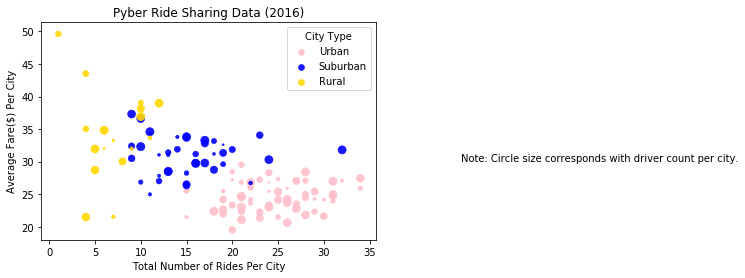

In [12]:
#Bubble Plot "Pyber Ride Sharing Data (2016)"
driver_count = cityandride_df["driver_count"]
plt.scatter(cityandride_df[cityandride_df['type'] == 'Urban']['rides per city'], cityandride_df[cityandride_df['type'] == 'Urban']['average fare'], c='pink', s=driver_count, alpha=0.9, linewidth=.5, label='Urban')
plt.scatter(cityandride_df[cityandride_df['type'] == 'Suburban']['rides per city'], cityandride_df[cityandride_df['type'] == 'Suburban']['average fare'], c='blue', s=driver_count, alpha=0.9, linewidth=.5, label='Suburban')
plt.scatter(cityandride_df[cityandride_df['type'] == 'Rural']['rides per city'], cityandride_df[cityandride_df['type'] == 'Rural']['average fare'], c='gold', s=driver_count, alpha=0.9, linewidth=.5,label='Rural')
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel('Total Number of Rides Per City')
plt.ylabel('Average Fare($) Per City')
plt.legend(title="City Type")
plt.text(45, 30, "Note: Circle size corresponds with driver count per city.", rotation='horizontal')
plt.show()

In [13]:
# Pie Chart % of Total Fares by City Type
# Labels for the sections of our pie chart
labels = ["Suburban", "Urban", "Rural"]

# The values of each section of the pie chart
sizes = [cityandride_df.loc[cityandride_df.type == "Suburban"]["fare"].sum(), cityandride_df.loc[cityandride_df.type == "Urban"]["fare"].sum(), cityandride_df.loc[cityandride_df.type == "Rural"]["fare"].sum()]

# The colors of each section of the pie chart
colors = ["blue", "pink", "gold"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.05, 0.05, 0.05)

In [14]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.title('% of Total Fares by City Type')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x117f344a8>,
  <matplotlib.text.Text at 0x117f579e8>])

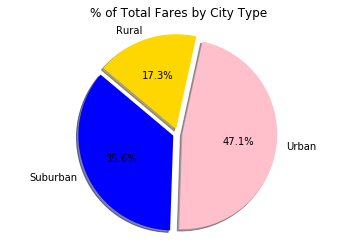

In [15]:
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

# Prints our pie chart to the screen
plt.show()

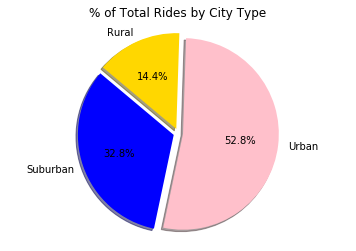

In [16]:
# Pie Chart % of Total Rides by City Type
# The values of each section of the pie chart
sizes2 = [len(cityandride_df.loc[cityandride_df.type == "Suburban"]["ride_id"]), len(cityandride_df.loc[cityandride_df.type == "Urban"]["ride_id"]), len(cityandride_df.loc[cityandride_df.type == "Rural"]["ride_id"])]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.title('% of Total Rides by City Type')
plt.pie(sizes2, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

# Prints our pie chart to the screen
plt.show()

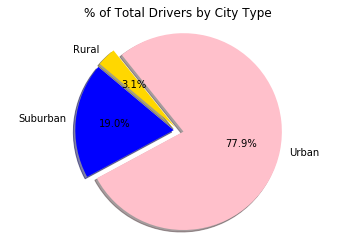

In [17]:
# Pie Chart % of Total Drivers by City Type
# The values of each section of the pie chart
sizes3 = [cityandride_df.loc[cityandride_df.type == "Suburban"]["driver_count"].sum(), cityandride_df.loc[cityandride_df.type == "Urban"]["driver_count"].sum(), cityandride_df.loc[cityandride_df.type == "Rural"]["driver_count"].sum()]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.title('% of Total Drivers by City Type')
plt.pie(sizes3, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

# Prints our pie chart to the screen
plt.show()